# Coding 4

## Baca data tampang lintang

In [5]:
import numpy as np
na=np.array([[1,2,3],[3,4,5]])
print(na[:,0])

[1 3]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import csv

pb_s = []        # buat list kosong untuk tampang lintang
pb_s_energi = [] # buat list kosong untuk energi

#loop ini hanya akan dieksekusi jika file terbuka
pb_hamburan="/raid/rhendiya/Metode Rekayasa Komputasi/MC coding - Indonesia/pb_hamburan.csv"
with open(pb_hamburan) as csvfile:
    pbScat = csv.reader(csvfile)
    for baris in pbScat:                    # loop baca setiap baris
        pb_s.append(float(baris[1]))
        pb_s_energi.append(float(baris[0]))
pb_hamburan = np.array([pb_s_energi, pb_s])          # buat array 2D: energy, tampanglintang hamburan

pb_abs = []        # buat list kosong untuk tampang lintang
pb_abs_energi = [] # buat list kosong untuk energi

#loop ini hanya akan dieksekusi jika file terbuka 
pb_serapan_filepath='/raid/rhendiya/Metode Rekayasa Komputasi/MC coding - Indonesia/pb_serapan.csv'
with open(pb_serapan_filepath) as csvfile:
    pbAbs = csv.reader(csvfile)
    for i,baris in enumerate(pbAbs):                       # loop baca setiap baris
        pb_abs.append(float(baris[1]))
        pb_abs_energi.append(float(baris[0]))
pb_absorpsi = np.array([pb_abs_energi, pb_abs])                 # buat array 2D: energy, tampanglintang absorbsi

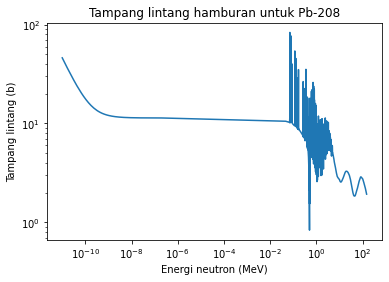

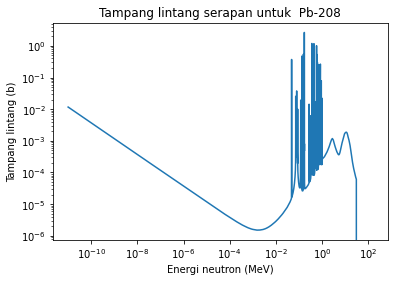

In [18]:
plt.figure()
plt.loglog(pb_hamburan[0,:]/1e6,pb_hamburan[1,:])  #buat plot skala log-log, energi dalam MeV dan tampanglintang hamburan
plt.xlabel('Energi neutron (MeV)')
plt.ylabel('Tampang lintang (b)')
plt.title('Tampang lintang hamburan untuk Pb-208')

plt.figure()
plt.loglog(pb_absorpsi[0,:]/1e6,pb_absorpsi[1,:])           #buat plot skala log-log, energi dalam MeV dan tampanglintang absorpsi
plt.xlabel('Energi neutron (MeV)')
plt.ylabel('Tampang lintang (b)')
plt.title('Tampang lintang serapan untuk  Pb-208')

plt.show()

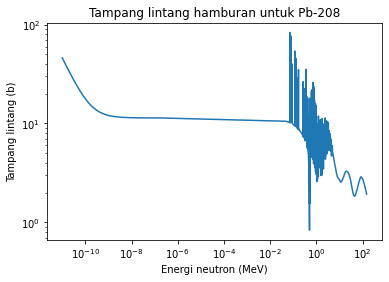

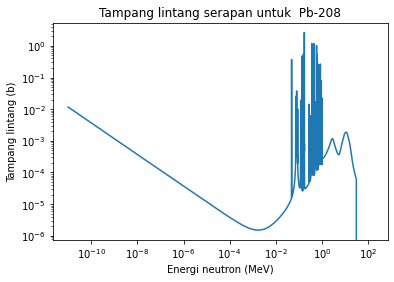

In [2]:
plt.figure()
plt.loglog(pb_hamburan[0,:]/1e6,pb_hamburan[1,:])  #buat plot skala log-log, energi dalam MeV dan tampanglintang hamburan
plt.xlabel('Energi neutron (MeV)')
plt.ylabel('Tampang lintang (b)')
plt.title('Tampang lintang hamburan untuk Pb-208')

plt.figure()
plt.loglog(...)                                    #buat plot skala log-log, energi dalam MeV dan tampanglintang absorpsi
plt.xlabel('Energi neutron (MeV)')
plt.ylabel('Tampang lintang (b)')
plt.title('Tampang lintang serapan untuk  Pb-208')

plt.show()

# Coding 5
## Mencari nilai tampang lintang

In [25]:
def cari_energi(data_set, inp_energi):
    """
    Mencari energi yang terdekat dengan data energi yang dimasukkan
    Input:
    data_set: vektor energi
    inp_energi : energi yang dicari
    
    Output:
    indeks : indeks dari energi terdekat yang ada di tabel
    """

    # argmin mengembalikan indeks dari anggota array terkecil
    # di sini kita akan mencari SELISIH minimum di antara energi input dengan tabel.
    # gunakan np.fabs

    index = np.argmin(np.abs(data_set-inp_energi))
    return index

In [26]:
# masukkan nilai energi yang akan dicari nilai tampang lintang hamburannya
E = 5e4

indeks = cari_energi(pb_hamburan[0,:],E)
pb_hamburan[:,indeks]

array([4.72788e+04, 1.05392e+01])

# Coding 6
## Sampling rejection

In [31]:
help(plt.axis)

Help on function axis in module matplotlib.pyplot:

axis(*args, emit=True, **kwargs)
    Convenience method to get or set some axis properties.
    
    Call signatures::
    
      xmin, xmax, ymin, ymax = axis()
      xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
      xmin, xmax, ymin, ymax = axis(option)
      xmin, xmax, ymin, ymax = axis(**kwargs)
    
    Parameters
    ----------
    xmin, xmax, ymin, ymax : float, optional
        The axis limits to be set.  This can also be achieved using ::
    
            ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    option : bool or str
        If a bool, turns axis lines and labels on or off. If a string,
        possible values are:
    
        ======== ==========================================================
        Value    Description
        ======== ==========================================================
        'on'     Turn on axis lines and labels. Same as ``True``.
        'off'    Turn off axis lines an

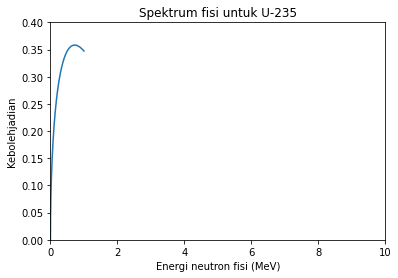

In [48]:
# buat fungsi lambda untuk mendeskripsikan spektrum Watt
expfiss = lambda E: 0.453*np.exp(-1.036*E)*np.sinh(np.sqrt(2.29*E))

#Buat plot
plt.plot(np.linspace(0,1,10001), expfiss(np.linspace(0,1,10001)))
plt.axis([0,10,0,0.4])
plt.xlabel('Energi neutron fisi (MeV)')
plt.ylabel('Kebolehjadian')
plt.title('Spektrum fisi untuk U-235')
plt.show()

In [55]:
# buat fungsi lambda untuk mendeskripsikan spektrum Watt
import sympy as sy
expfiss = lambda E: 0.453*np.exp(-1.036*E)*sy.sinh(np.sqrt(2.29*E), dtype=np.longdouble)

#Buat plot
plt.plot(pb_hamburan[0,:], expfiss(pb_hamburan[0,:]))
plt.axis([0,10,0,0.4])
plt.xlabel('Energi neutron fisi (MeV)')
plt.ylabel('Kebolehjadian')
plt.title('Spektrum fisi untuk U-235')
plt.show()

ModuleNotFoundError: No module named 'sympy'

In [54]:
np.sqrt(4)

2.0

In [44]:
len(pb_hamburan[0,:])

5311

In [45]:
N = 10   # banyaknya sampel yang diterima

# buat rentang energi dan probabilitas
min_eng = np.min(pb_hamburan[0,:])   # ambil energi minimum dari data hamburan
max_eng = 1e7
max_prob = np.max(np.max(expfiss(pb_hamburan[0,:])))

# inisialisasi
x_diterima = []
y_diterima = []
x_ditolak = []
y_ditolak = []


for i in range(N):
    ditolak = True      # inisialisasi untuk looping
    while (ditolak):
        
        x = np.random.uniform(min_eng, max_eng, 1)  # ambil x (energi) secara acak
        y = np.random.uniform(0, 1, 1)   # ambil y (kebolehjadian) secara acak
        rel_prob = expfiss(x)               # tentukan probabilitas relatif berdasar spektrum Watt
        
        if (y < rel_prob):            # kondisi jika diterima
            x_diterima.append(x)
            y_diterima.append(y)
            ditolak = False
        else:
            x_ditolak.append(x)
            y_ditolak.append(y)

diterima = np.array([x_diterima, y_diterima])
ditolak = np.array([x_ditolak, y_ditolak])


# Buat plot distribusi
from matplotlib.patches import Polygon
ax = plt.subplot(111)
plt.plot(pb_hamburan[0,:]/1e6, expfiss(pb_hamburan[0,:]))
plt.xlabel('Energi neutron fisi (MeV)')
plt.ylabel('Kebolehjadian')
plt.title('Spektrum fisi untuk U-235\n N = ' + str(N))
verts = [(min_eng,0),(min_eng,max_prob), (max_eng,max_prob),(max_eng,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
plt.plot(diterima[0,:]/1e6, diterima[1,:],'o',label='Diterima')
plt.plot(ditolak[0,:]/1e6, ditolak[1,:],'*',label='Ditolak')
plt.axis([0,10,0,0.4])
plt.legend(bbox_to_anchor=(0, 1.05), loc=0, borderaxespad=0.)
plt.show()

# Buat plot histogram
plt.figure()
plt.hist(diterima[0,:]/1.0e6, bins=20)
plt.title("Histogram dari titik-titik yang diterima")
plt.xlabel("Energi neutron fisi (MeV)")
plt.ylabel("Jumlah di bin")
plt.show()

/raid/rhendiya/.conda/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/raid/rhendiya/.conda/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


KeyboardInterrupt: 

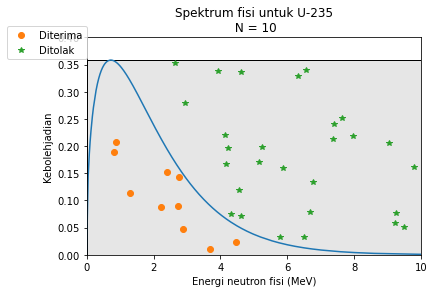

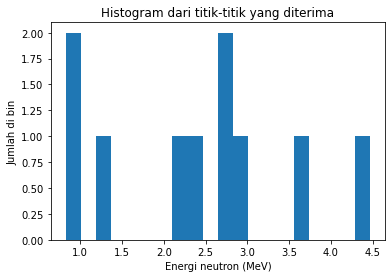

In [33]:
N = 10   # banyaknya sampel yang diterima

# buat rentang energi dan probabilitas
min_eng = np.min(pb_hamburan[0,:])   # ambil energi minimum dari data hamburan
max_eng = 1e7
max_prob = np.max(np.max(expfiss(pb_hamburan[0,:])))

# inisialisasi
x_diterima = []
y_diterima = []
x_ditolak = []
y_ditolak = []


for i in range(N):
    ditolak = True      # inisialisasi untuk looping
    while (ditolak):
        
        x = np.random.uniform(min_eng, max_eng, 1)  # ambil x (energi) secara acak
        y = np.random.uniform(0, 1, 1)   # ambil y (kebolehjadian) secara acak
        rel_prob = expfiss(x)               # tentukan probabilitas relatif berdasar spektrum Watt
        
        if (y < rel_prob):            # kondisi jika diterima
            x_diterima.append(x)
            y_diterima.append(y)
            ditolak = False
        else:
            x_ditolak.append(x)
            y_ditolak.append(y)

diterima = np.array([..., ...])
ditolak = np.array([..., ...])


# Buat plot distribusi
from matplotlib.patches import Polygon
ax = plt.subplot(111)
plt.plot(pb_hamburan[0,:]/1e6, expfiss(pb_hamburan[0,:]))
plt.xlabel('Energi neutron fisi (MeV)')
plt.ylabel('Kebolehjadian')
plt.title('Spektrum fisi untuk U-235\n N = ' + str(N))
verts = [(min_eng,0),(min_eng,max_prob), (max_eng,max_prob),(max_eng,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
plt.plot(diterima[0,:]/1e6, diterima[1,:],'o',label='Diterima')
plt.plot(ditolak[0,:]/1e6, ditolak[1,:],'*',label='Ditolak')
plt.axis([0,10,0,0.4])
plt.legend(bbox_to_anchor=(0, 1.05), loc=0, borderaxespad=0.)
plt.show()

# Buat plot histogram
plt.figure()
plt.hist(diterima[0,:]/1.0e6, bins=20)
plt.title("Histogram dari titik-titik yang diterima")
plt.xlabel("Energi neutron fisi (MeV)")
plt.ylabel("Jumlah di bin")
plt.show()

# Coding 7
## Shielding Pb-208

In [44]:
def perisai_papan(sig_s,sig_a,tebal,densitas,A,N,isotropik=False):
    """Hitung fraksi neutron yang bocor melalui papan
    Argumen:
    sig_s:     Array tampang lintang mikroskopik hamburan dalam bentuk [energi, tampang lintang]
    sig_a:     Tampang lintang mikroskopik serapan
    tebal:     tebal papan
    densitas:  densitas  material dalam atoms per cm^3
    A:         berat atom perisai
    N:         banyaknya neutron yang disimulasikan
    isotropik: apakah neutron isotropik ataukah pancaran
    
    Return:
    transmisi:  energi neutron yang bocor
    lahir:     energi neutron yang dilahirkan
    """
    alpha = ...
    Sig_s = sig_s.copy()
    Sig_a = sig_a.copy()
    Sig_s[1,:] = ...
    Sig_a[1,:] = ...
    
    #buat sampel
    min_eng = np.min(...)  # cari energi minimum dari data tampanglintang hamburan dan absorpsi
    max_eng = np.max(...)  # cari energi maksimum dari data tampanglintang hamburan dan absorpsi
    max_prob = np.max(...)             # cari nilai maksimum dari probabilitas Watt
    transmisi = []
    lahir = []
    N = int(N)
    
    for i in range(N):
        #lakukan sampling arah
        if (isotropik):
            mu = ...
        else:
            mu = ...
            
        #hitung energi menggunakan rejection sampling
        ditolak = ...
        while (ditolak):
            x = np.random.uniform(min_eng,max_eng)   #ambil x (energi) secara acak
            y = np.random.uniform(0,max_prob)        #ambil y (kebolehjadian) secara acak
            rel_prob = expfiss(x)                 #tentukan probabilitas relatif berdasar spektrum Watt
            if (y  rel_prob):
                energi = ...
                ditolak = ...
                
        #posisi awal adalah 0
        x = 0
        lahir.append(energi)
        hidup = ...
        while (hidup):
            #tentukan jarak ke tumbukan 
            indeks_hamburan = cari_energi(..., ...)               # tentukan indeks energi untuk reaksi hamburan
            indeks_absorpsi = cari_energi(..., ...)               # tentukan indeks energi untuk reaksi absorpsi
            tampanglintang_hamburan = Sig_s[..., ...]    # tentukan tampanglintang hamburan pada energi sesuai indeks
            tampanglintang_absorpsi = Sig_a[..., ...]    # tentukan tampanglintang absorpsi pada energi sesuai indeks
            Sig_t = tampanglintang_hamburan + tampanglintang_absorpsi  # hitung tampanglintang total
            l = -np.log(1-np.random.random())/Sig_t      # hitung panjang lintasan secara acak
            
            #pindahkan partikel
            x += ...
            
            # cek apakah masih di dalam papan
            if (x>tebal):       
                transmisi.append(energi)
                hidup = ...
            elif (x<0):
                hidup = ...
            else:
                #hamburan atau serapan 
                if (np.random.random() < tampanglintang_hamburan/Sig_t): 
                    # terjadi hamburan, tentukan nilai mu baru dan energi
                    mu = ...
                    energi = ...
                else: #diserap
                    hidup = ... 
    return transmisi, lahir


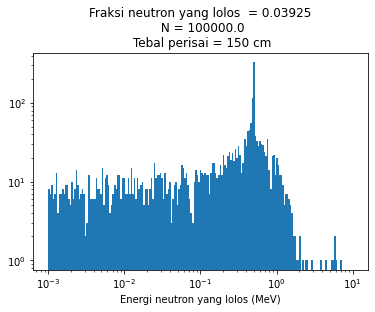

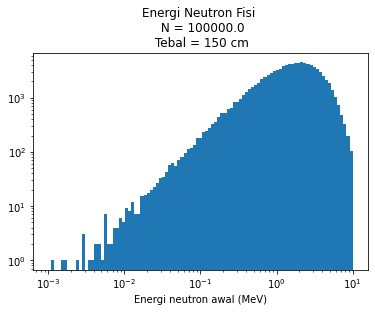

In [62]:
N = 1e5
A = 208
rho = 11.34
Avogadro = 6.022e23
densitas = rho/A*Avogadro
tebal = 150

transmisi,muncul = perisai_papan(pb_hamburan,pb_absorpsi, tebal,densitas,A, N, isotropik=True)

#buat plot
plt.hist(np.array(transmisi)/1.e6,bins = 10 ** np.linspace(np.log10(0.001), np.log10(10), 200))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel("Energi neutron yang lolos (MeV)")
plt.title("Fraksi neutron yang lolos  = " + str(len(transmisi)/N) +"\n N = " + str(N) + "\n Tebal perisai = " + str(tebal) + " cm")
plt.show

plt.figure()
plt.hist(np.array(muncul)/1.e6,bins = 10 ** np.linspace(np.log10(0.001), np.log10(10), 100))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel("Energi neutron awal (MeV)")
plt.title("Energi Neutron Fisi \n N = " + str(N) +"\n Tebal = " + str(tebal) + " cm")
plt.show()